In [71]:
!pip3 install IPython

In [72]:
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [73]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# This is the library for the Reservoir Computing got it by: https://github.com/cknd/pyESN
from pyESN import ESN 
%matplotlib inline

In [74]:
data = open("amazon.txt").read().split()
data = np.array(data).astype('float64')

In [75]:
n_reservoir= 500
sparsity=0.2
rand_seed=23
spectral_radius = 1.2
noise = .0005


esn = ESN(n_inputs = 1,
      n_outputs = 1, 
      n_reservoir = n_reservoir,
      sparsity=sparsity,
      random_state=rand_seed,
      spectral_radius = spectral_radius,
      noise=noise)

trainlen = 1650
future = 1
futureTotal=120
pred_tot=np.zeros(futureTotal)

for i in range(0,futureTotal,future):
    pred_training = esn.fit(np.ones(trainlen),data[i:trainlen+i])
    prediction = esn.predict(np.ones(future))
    pred_tot[i:i+future] = prediction[:,0]

In [76]:
import seaborn as sns
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

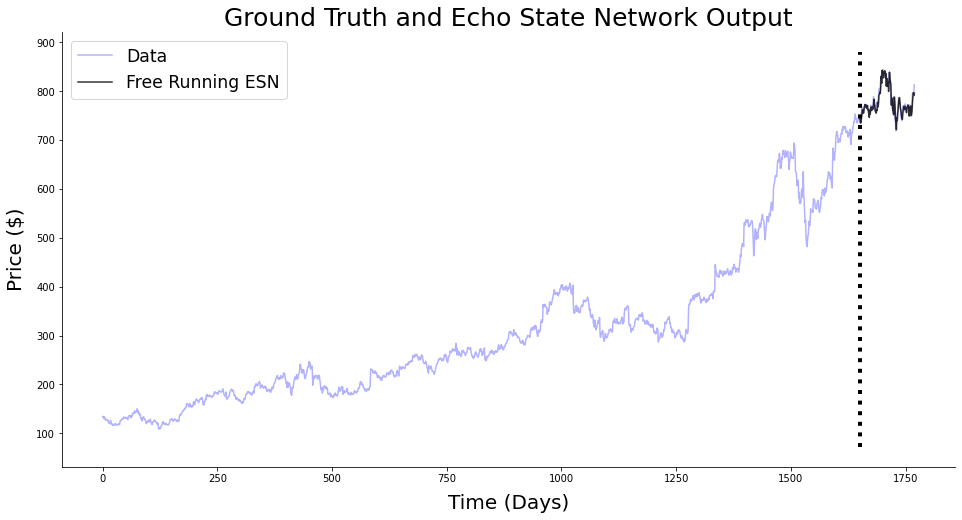

In [77]:

plt.figure(figsize=(16,8))
plt.plot(range(0,trainlen+futureTotal),data[0:trainlen+futureTotal],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

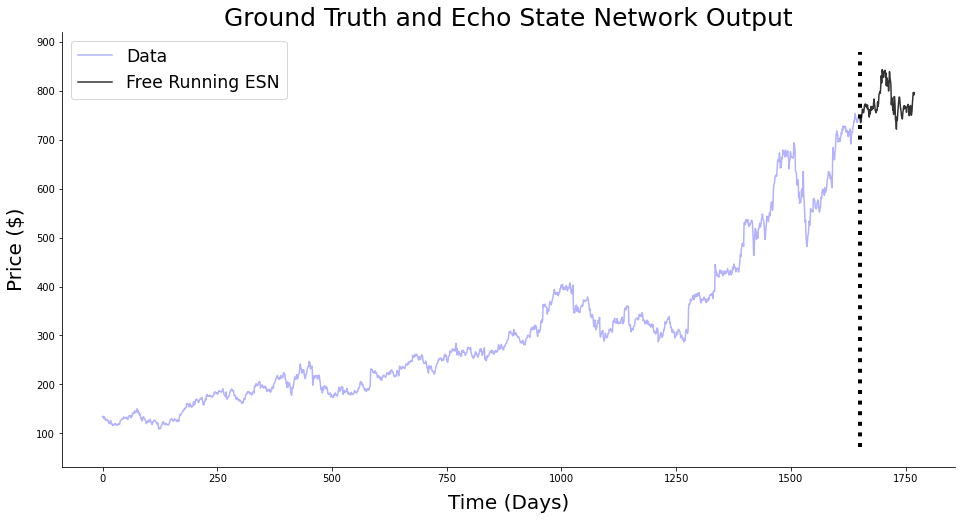

In [78]:
plt.figure(figsize=(16,8))
plt.plot(range(0,trainlen),data[0:trainlen],'b',label="Data", alpha=0.3)
#plt.plot(range(0,trainlen),pred_training,'.g',  alpha=0.3)
plt.plot(range(trainlen,trainlen+futureTotal),pred_tot,'k',  alpha=0.8, label='Free Running ESN')

lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:', linewidth=4)

plt.title(r'Ground Truth and Echo State Network Output', fontsize=25)
plt.xlabel(r'Time (Days)', fontsize=20,labelpad=10)
plt.ylabel(r'Price ($)', fontsize=20,labelpad=10)
plt.legend(fontsize='xx-large', loc='best')
sns.despine()

In [79]:
original = data[trainlen:trainlen+futureTotal]
new= pred_tot
print(original-new)

[ -6.8854973   -6.94543599   1.8175169   14.23360119  12.93262376
  13.98272308  -2.13221871  -2.54693438   5.61123302   9.57481688
  -1.29105707  -3.5601981   -4.62932242   2.99598593   0.37905156
   3.07789042  -1.56842205  -6.52161991   2.45891455  -4.97637895
   9.0922692   16.01866383  -4.23700928   6.25197617   3.81311719
   3.16594225   6.9909123    6.31295859   3.06246226   8.98511529
  17.89431832   1.03845632   8.65694056  -8.25087255  12.21629853
   1.88022511   5.89017091   8.39145291  17.70708953  -2.42382806
  12.16669614  15.3757152   12.91754348  10.92385593   1.06442932
  20.69742218  17.54129559  -2.09877891  21.0178196   -6.58267673
  -0.85262843  17.2185516    3.80098493  -0.92761103   4.35129272
 -10.98658249   6.36270397  -7.46356291  12.28922195 -13.92177945
   7.79604542   3.82546417  -9.2087107   19.27478107  20.0981155
  -4.15038811  -4.30626235  -1.77024448 -36.65277441  18.3008018
  -0.58023785 -14.38220063   6.11465038  -6.01544958  33.10245392
  -0.6478137

In [80]:
error = np.mean( new != original )

In [81]:
print(error)

1.0


In [82]:
error/(float(original.size))

0.008333333333333333

In [83]:
print(new)

[746.4954973  742.53543599 734.8524831  738.37639881 745.87737624
 753.75727692 762.71221871 757.18693438 755.15876698 756.40518312
 767.85105707 771.8701981  773.18932242 768.24401407 772.18094844
 765.41210958 765.60842205 771.15161991 762.00108545 762.28637895
 750.3877308  746.43133617 761.48700928 752.96802383 765.18688281
 768.12405775 760.5890877  762.84704141 767.55753774 763.45488471
 770.97568168 783.44154368 775.40305944 768.39087255 759.27370147
 759.12977489 755.19982909 761.29854709 760.81291047 777.52382806
 768.05330386 774.3642848  791.78245652 794.82614407 798.09557068
 795.41257782 811.17870441 831.14877891 816.2921804  843.32267673
 834.88262843 827.1414484  837.85901507 840.35761103 837.35870728
 841.98658249 827.72729603 836.74356291 810.67077805 826.87177945
 809.85395458 813.86453583 819.5287107  799.71521893 817.9918845
 839.33038811 826.89626235 820.13024448 812.97277441 771.5191982
 785.99023785 779.94220063 760.91534962 761.06544958 751.82754608
 788.3978137

In [84]:
new

array([746.4954973 , 742.53543599, 734.8524831 , 738.37639881,
       745.87737624, 753.75727692, 762.71221871, 757.18693438,
       755.15876698, 756.40518312, 767.85105707, 771.8701981 ,
       773.18932242, 768.24401407, 772.18094844, 765.41210958,
       765.60842205, 771.15161991, 762.00108545, 762.28637895,
       750.3877308 , 746.43133617, 761.48700928, 752.96802383,
       765.18688281, 768.12405775, 760.5890877 , 762.84704141,
       767.55753774, 763.45488471, 770.97568168, 783.44154368,
       775.40305944, 768.39087255, 759.27370147, 759.12977489,
       755.19982909, 761.29854709, 760.81291047, 777.52382806,
       768.05330386, 774.3642848 , 791.78245652, 794.82614407,
       798.09557068, 795.41257782, 811.17870441, 831.14877891,
       816.2921804 , 843.32267673, 834.88262843, 827.1414484 ,
       837.85901507, 840.35761103, 837.35870728, 841.98658249,
       827.72729603, 836.74356291, 810.67077805, 826.87177945,
       809.85395458, 813.86453583, 819.5287107 , 799.71

In [85]:
new.size

120

In [86]:
diff = [100]
for i in range(100):
    diff[i] = original[i]-new[i]
print(diff)

IndexError: list assignment index out of range

In [87]:
original

array([739.61, 735.59, 736.67, 752.61, 758.81, 767.74, 760.58, 754.64,
       760.77, 765.98, 766.56, 768.31, 768.56, 771.24, 772.56, 768.49,
       764.04, 764.63, 764.46, 757.31, 759.48, 762.45, 757.25, 759.22,
       769.  , 771.29, 767.58, 769.16, 770.62, 772.44, 788.87, 784.48,
       784.06, 760.14, 771.49, 761.01, 761.09, 769.69, 778.52, 775.1 ,
       780.22, 789.74, 804.7 , 805.75, 799.16, 816.11, 828.72, 829.05,
       837.31, 836.74, 834.03, 844.36, 841.66, 839.43, 841.71, 831.  ,
       834.09, 829.28, 822.96, 812.95, 817.65, 817.69, 810.32, 818.99,
       838.09, 835.18, 822.59, 818.36, 776.32, 789.82, 785.41, 765.56,
       767.03, 755.05, 784.93, 787.75, 771.88, 742.38, 739.01, 719.07,
       743.24, 746.49, 756.4 , 760.16, 780.  , 785.33, 780.12, 780.37,
       766.77, 762.52, 750.57, 743.65, 740.34, 759.36, 764.72, 770.42,
       767.33, 768.66, 760.12, 774.34, 768.82, 761.  , 757.77, 766.  ,
       771.22, 770.6 , 766.34, 760.59, 771.4 , 772.13, 765.15, 749.87,
      

In [88]:
new

array([746.4954973 , 742.53543599, 734.8524831 , 738.37639881,
       745.87737624, 753.75727692, 762.71221871, 757.18693438,
       755.15876698, 756.40518312, 767.85105707, 771.8701981 ,
       773.18932242, 768.24401407, 772.18094844, 765.41210958,
       765.60842205, 771.15161991, 762.00108545, 762.28637895,
       750.3877308 , 746.43133617, 761.48700928, 752.96802383,
       765.18688281, 768.12405775, 760.5890877 , 762.84704141,
       767.55753774, 763.45488471, 770.97568168, 783.44154368,
       775.40305944, 768.39087255, 759.27370147, 759.12977489,
       755.19982909, 761.29854709, 760.81291047, 777.52382806,
       768.05330386, 774.3642848 , 791.78245652, 794.82614407,
       798.09557068, 795.41257782, 811.17870441, 831.14877891,
       816.2921804 , 843.32267673, 834.88262843, 827.1414484 ,
       837.85901507, 840.35761103, 837.35870728, 841.98658249,
       827.72729603, 836.74356291, 810.67077805, 826.87177945,
       809.85395458, 813.86453583, 819.5287107 , 799.71

In [89]:
original[1]-new[1]

-6.945435994074273

In [90]:
new[-1]

796.3466355497806

In [91]:
data[-1]

848.64

In [92]:
difference = new[-1]-data[-1]